# GRIP : The Sparks Foundation 

### Data Science and Business Analytics Intern 

### Author : Pavan Wanjari

### Task 1 : Prediction Using Supervised Machine Learning (Simple Linear Regression)

In this task we have to predict the Percentage Scores of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and target value is the percentage of Scores. This can be solved by using Simple Linear Regression. 

#### 1. Import Libraries

I am importing Pandas libraries for data manupulation and handling,
Matplotlib ans seaborn libraries for visualization , 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2. Read Data From URL

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)   # check data first 10 rows 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### 3. Exploring Data

In [3]:
print(df.shape) # check shape of data

(25, 2)


In [4]:
df.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info() # check how many data types present in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


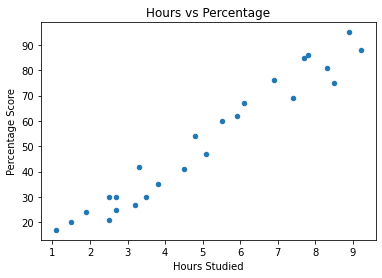

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', kind='scatter')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [7]:
df.corr(method='pearson') # checking correlation with Pearson method

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Density'>

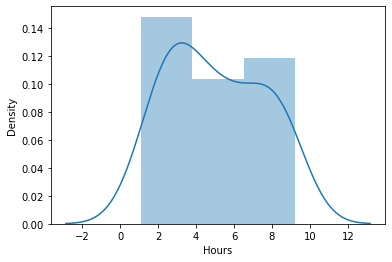

In [8]:
sns.distplot(df['Hours']) # Distritution of Hours col

<AxesSubplot:xlabel='Scores', ylabel='Density'>

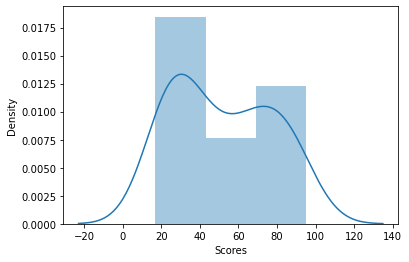

In [9]:
sns.distplot(df['Scores'])

Distribution plot shows the variables are in perticular range. There is no outliers present in data. 

#### 4. Linear Regression

In [45]:
# Divide the data into "attributes" (inputs) and "labels" (outputs).
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [46]:
# Split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

#### 5. Training Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [47]:
from sklearn.linear_model import LinearRegression  # we use linear regression for modelling of data because data is continous.
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression()

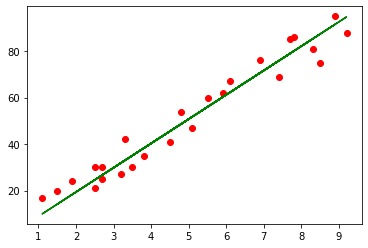

In [54]:
# Plotting the regression line
m = lr.coef_
c = lr.intercept_
line = m*X + c

# Plotting for the test data
plt.scatter(X, y, c ="r")
plt.plot(X, line, c="g");
plt.show()

In [49]:
# Making Prediction 
y_pred = lr.predict(X_test) # Predicting the scores

In [50]:
prediction = pd.DataFrame({'Target': y_test, 'Predicted': y_pred})
prediction

,Target,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


#### 6. What would be the predicted score if a students studies for 9.25 hours/day ?

In [51]:
h = 9.25
s = lr.predict([[h]])
print("No of Hours = {}".format(h))
print("Predicted Score = {}".format(s[0]))

No of Hours = 9.25
Predicted Score = 95.22829438402952


#### 7. Model Evaluation

In [55]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score:', r2_score(y_test, y_pred))     # we check R^2 for checking goodness of data.

Mean Absolute Error: 7.882398086270432
R2 Score: 0.8421031525243527


## From our Linear Regression model, if students study 9.25 hrs/day they will score "95.22" marks.

## Thank You !